In [1]:
import pandas as pd 
import numpy as np

In [2]:
d = pd.DataFrame({
    "Item": ['Item0', 'Item0', 'Item1', 'Item1'],
    "CType":['Gold', 'Bronze', 'Gold', 'Silver'],
    "USD":  ['1$', '2$', '3$', '4$'],
    "EU":  ['1€', '2€', '3€', '4€']
})

In [3]:
p=d.pivot(index="Item",columns="CType",values='USD')
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


In [4]:
print(d[(d.Item=='Item0')&(d.CType=='Gold')].USD.values)

['1$']


In [5]:
print(p[p.index=="Item0"].Gold.values)

['1$']


In [6]:
p1=d.pivot(index='Item',columns="CType")
p1

USD                 EU            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0     2$   1$    NaN     2€   1€    NaN
Item1    NaN   3$     4$    NaN   3€     4€

In [7]:
p1.USD[p1.USD.index=="Item0"].Gold.values

array(['1$'], dtype=object)

In [8]:
type(p1.sort_values(by='Item'))

pandas.core.frame.DataFrame

In [9]:
d2= pd.DataFrame({
    "Item": ['Item0', 'Item0', 'Item0', 'Item1'],
    "CType":['Gold', 'Bronze', 'Gold', 'Silver'],
    "USD":  [1,2,3,4],
    "EU":  [1,2,3,4]
})

In [10]:
p2=d2.pivot(index='Item',columns="CType",values='USD')

ValueError: Index contains duplicate entries, cannot reshape

In [11]:
p2=d2.pivot_table(index='Item',columns="CType",values='USD',aggfunc="mean")
p2

CType,Bronze,Gold,Silver
Item,,,
Item0,2.0,2.0,NaN
Item1,NaN,NaN,4.0


In [12]:
p20=d2.pivot_table(index='Item',columns="CType",aggfunc="mean")
p20

EU                USD            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0    2.0  2.0    NaN    2.0  2.0    NaN
Item1    NaN  NaN    4.0    NaN  NaN    4.0

In [13]:
p3=d2.pivot_table(index='Item',columns="CType",values='USD',aggfunc="min")
p3

CType,Bronze,Gold,Silver
Item,,,
Item0,2.0,1.0,NaN
Item1,NaN,NaN,4.0


In [14]:
r1=pd.read_csv('weather.csv')
r2=pd.read_csv('weather2.csv')
r3=pd.read_csv('weather3.csv')

In [15]:
r2

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [16]:
r1.pivot(index='city',columns='date')

temperature                   humidity                  
date        5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing           80       77       79       26       30       35
mumbai            75       78       82       80       83       85
new york          65       66       68       56       58       60

In [17]:
r1.pivot(index='city',columns='date',values='humidity')

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


In [18]:
r1.index.name=None
r1

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [19]:
r10=r1.copy()
r10.columns.name=None
r10

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [20]:
r1.pivot(index='date',columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [21]:
r2.pivot(index='city',columns='date')

ValueError: Index contains duplicate entries, cannot reshape

In [22]:
r2.pivot_table(index='date',columns='city')

humidity          temperature         
city       mumbai new york      mumbai new york
date                                           
5/1/2017     81.5     55.0        76.5     63.0
5/2/2017     55.5     61.0        81.0     71.0

In [23]:
r2.pivot_table(index='date',columns='city',margins=True)

humidity                 temperature                 
city       mumbai new york    All      mumbai new york     All
date                                                          
5/1/2017     81.5     55.0  68.25       76.50     63.0  69.750
5/2/2017     55.5     61.0  58.25       81.00     71.0  76.000
All          68.5     58.0  63.25       78.75     67.0  72.875

In [24]:
m=pd.read_csv('weather1.csv')
m

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [25]:
m10=pd.melt(m,id_vars='day')
m10

,day,variable,value
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [26]:
m11=pd.melt(m,id_vars='day',var_name='city',value_name='temperature')
m11

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [27]:
unmelt=m11.pivot(index='day',columns='city')
unmelt

temperature                
city           berlin chennai chicago
day                                  
Friday             30      83      30
Monday             41      75      32
Saturday           45      81      20
Sunday             47      77      25
Thursday           38      82      22
Tuesday            43      77      30
Wednesday          45      75      28

In [28]:
unmelt.columns=unmelt.columns.droplevel()


In [29]:
unmelt.index.name=None
unmelt

city,berlin,chennai,chicago
Friday,30,83,30
Monday,41,75,32
Saturday,45,81,20
Sunday,47,77,25
Thursday,38,82,22
Tuesday,43,77,30
Wednesday,45,75,28


In [30]:
mult=pd.read_csv('http://files.zillowstatic.com/research/public_v2/invt_fs/Metro_invt_fs_uc_sfrcondo_smoothed_month.csv')
mult

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,102001,0,United States,Country,NaN,1526341.0,1434534.0,1391815.0,1449329.0,1537346.0,...,1785815.0,1710360.0,1590375.0,1482973.0,1433102.0,1463140.0,1454191.0,1478228.0,1479090.0,1508701.0
1,394913,1,"New York, NY",Msa,NY,75190.0,69753.0,69342.0,73928.0,81015.0,...,94516.0,91127.0,84177.0,77873.0,75633.0,78236.0,76005.0,74365.0,74180.0,81161.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,22029.0,20161.0,19992.0,21948.0,23878.0,...,30457.0,28426.0,25208.0,22436.0,21371.0,21903.0,21578.0,22004.0,23008.0,25077.0
3,394463,3,"Chicago, IL",Msa,IL,41680.0,37654.0,36193.0,39377.0,43376.0,...,53682.0,50835.0,46043.0,41857.0,40653.0,42271.0,42220.0,42596.0,43114.0,45411.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,26485.0,24282.0,23202.0,24343.0,26756.0,...,38707.0,36985.0,34600.0,32400.0,31493.0,32170.0,32298.0,33283.0,33879.0,34781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,394586,504,"Faribault, MN",Msa,MN,NaN,NaN,NaN,NaN,NaN,...,301.0,286.0,257.0,225.0,212.0,222.0,240.0,260.0,267.0,280.0
117,394309,527,"Albemarle, NC",Msa,NC,244.0,237.0,233.0,245.0,253.0,...,271.0,264.0,242.0,218.0,207.0,212.0,211.0,208.0,200.0,192.0
118,394742,595,"Kerrville, TX",Msa,TX,387.0,370.0,357.0,352.0,361.0,...,415.0,399.0,384.0,370.0,363.0,368.0,365.0,364.0,367.0,380.0
119,395091,641,"Shelbyville, TN",Msa,TN,199.0,202.0,200.0,200.0,203.0,...,254.0,265.0,262.0,254.0,244.0,240.0,235.0,241.0,240.0,234.0


In [31]:
m2=pd.melt(mult,id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'],var_name='year_val',value_name='count')
m2

,RegionID,SizeRank,RegionName,RegionType,StateName,year_val,count
0,102001,0,United States,Country,NaN,2017-12-31,1526341.0
1,394913,1,"New York, NY",Msa,NY,2017-12-31,75190.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2017-12-31,22029.0
3,394463,3,"Chicago, IL",Msa,IL,2017-12-31,41680.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2017-12-31,26485.0
...,...,...,...,...,...,...,...
3867,394586,504,"Faribault, MN",Msa,MN,2020-07-31,280.0
3868,394309,527,"Albemarle, NC",Msa,NC,2020-07-31,192.0
3869,394742,595,"Kerrville, TX",Msa,TX,2020-07-31,380.0
3870,395091,641,"Shelbyville, TN",Msa,TN,2020-07-31,234.0


In [32]:
m2.shape

(3872, 7)

In [33]:
m2.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
year_val       object
count         float64
dtype: object

In [34]:
m2['year_val'].str.split('-').head(7)

0    [2017, 12, 31]
1    [2017, 12, 31]
2    [2017, 12, 31]
3    [2017, 12, 31]
4    [2017, 12, 31]
5    [2017, 12, 31]
6    [2017, 12, 31]
Name: year_val, dtype: object

In [35]:
m2[['year','month','date']]=m2['year_val'].str.split('-',expand=True)
m2

,RegionID,SizeRank,RegionName,RegionType,StateName,year_val,count,year,month,date
0,102001,0,United States,Country,NaN,2017-12-31,1526341.0,2017,12,31
1,394913,1,"New York, NY",Msa,NY,2017-12-31,75190.0,2017,12,31
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2017-12-31,22029.0,2017,12,31
3,394463,3,"Chicago, IL",Msa,IL,2017-12-31,41680.0,2017,12,31
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,2017-12-31,26485.0,2017,12,31
...,...,...,...,...,...,...,...,...,...,...
3867,394586,504,"Faribault, MN",Msa,MN,2020-07-31,280.0,2020,07,31
3868,394309,527,"Albemarle, NC",Msa,NC,2020-07-31,192.0,2020,07,31
3869,394742,595,"Kerrville, TX",Msa,TX,2020-07-31,380.0,2020,07,31
3870,395091,641,"Shelbyville, TN",Msa,TN,2020-07-31,234.0,2020,07,31


In [36]:
m2.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
year_val       object
count         float64
year           object
month          object
date           object
dtype: object

In [37]:
m2.convert_dtypes(infer_objects=True)
m2.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
year_val       object
count         float64
year           object
month          object
date           object
dtype: object

In [38]:
st=pd.read_excel('stocks.xlsx',header=[0,1],index_col=[0])
st

Price                  Price to earnings ratio (P/E)         \
Company    Facebook Google Microsoft                      Facebook Google   
2017-06-05      155    955        66                         37.10   32.0   
2017-06-06      150    987        69                         36.98   31.3   
2017-06-07      153    963        62                         36.78   31.7   
2017-06-08      155   1000        61                         36.11   31.2   
2017-06-09      156   1012        66                         37.07   30.0   

                      
Company    Microsoft  
2017-06-05     30.31  
2017-06-06     30.56  
2017-06-07     30.46  
2017-06-08     30.11  
2017-06-09     31.00

In [39]:
s=st.stack(level=1)
s

Price  Price to earnings ratio (P/E)
           Company                                        
2017-06-05 Facebook     155                          37.10
           Google       955                          32.00
           Microsoft     66                          30.31
2017-06-06 Facebook     150                          36.98
           Google       987                          31.30
           Microsoft     69                          30.56
2017-06-07 Facebook     153                          36.78
           Google       963                          31.70
           Microsoft     62                          30.46
2017-06-08 Facebook     155                          36.11
           Google      1000                          31.20
           Microsoft     61                          30.11
2017-06-09 Facebook     156                          37.07
           Google      1012                          30.00
           Microsoft     66                          31.00

In [40]:
st.stack(level=0)

Company                                   Facebook  Google  Microsoft
2017-06-05 Price                            155.00   955.0      66.00
           Price to earnings ratio (P/E)     37.10    32.0      30.31
2017-06-06 Price                            150.00   987.0      69.00
           Price to earnings ratio (P/E)     36.98    31.3      30.56
2017-06-07 Price                            153.00   963.0      62.00
           Price to earnings ratio (P/E)     36.78    31.7      30.46
2017-06-08 Price                            155.00  1000.0      61.00
           Price to earnings ratio (P/E)     36.11    31.2      30.11
2017-06-09 Price                            156.00  1012.0      66.00
           Price to earnings ratio (P/E)     37.07    30.0      31.00

In [41]:
s.unstack()

Price                  Price to earnings ratio (P/E)         \
Company    Facebook Google Microsoft                      Facebook Google   
2017-06-05      155    955        66                         37.10   32.0   
2017-06-06      150    987        69                         36.98   31.3   
2017-06-07      153    963        62                         36.78   31.7   
2017-06-08      155   1000        61                         36.11   31.2   
2017-06-09      156   1012        66                         37.07   30.0   

                      
Company    Microsoft  
2017-06-05     30.31  
2017-06-06     30.56  
2017-06-07     30.46  
2017-06-08     30.11  
2017-06-09     31.00

In [42]:
st1=pd.read_excel('stocks3.xlsx',header=[0,1,2],index_col=[0])
st1

Price Ratios                                                        \
               Price                  Price to earnings ratio (P/E)          
Company     Facebook Google Microsoft                      Facebook Google   
Q1 2016          155    955        66                         37.10   32.0   
Q2 2016          150    987        69                         36.98   31.3   
Q3 2016          153    963        62                         36.78   31.7   
Q4 2016          155   1000        61                         36.11   31.2   
Q1 2017          156   1012        66                         37.07   30.0   

                  Income Statement                                     \
                         Net Sales                  Net Profit          
Company Microsoft         Facebook Google Microsoft   Facebook Google   
Q1 2016     30.31              2.6     20     18.70       0.80   5.43   
Q2 2016     30.56              3.1     22     21.30       0.97   5.89   
Q3 2016     30.46              4.3     24     21.45       1.20   6.10   
Q4 2016     30.11              6.7     26     21.88       1.67   6.50   
Q1 2017     31.00              8.1     31     22.34       2.03   6.40   

                   
                   
Company Microsoft  
Q1 2016      4.56  
Q2 2016      5.10  
Q3 2016      5.43  
Q4 2016      5.89  
Q1 2017      6.09

In [43]:
st1.stack(level=2)

Income Statement           Price Ratios  \
                        Net Profit Net Sales        Price   
        Company                                             
Q1 2016 Facebook              0.80      2.60          155   
        Google                5.43     20.00          955   
        Microsoft             4.56     18.70           66   
Q2 2016 Facebook              0.97      3.10          150   
        Google                5.89     22.00          987   
        Microsoft             5.10     21.30           69   
Q3 2016 Facebook              1.20      4.30          153   
        Google                6.10     24.00          963   
        Microsoft             5.43     21.45           62   
Q4 2016 Facebook              1.67      6.70          155   
        Google                6.50     26.00         1000   
        Microsoft             5.89     21.88           61   
Q1 2017 Facebook              2.03      8.10          156   
        Google                6.40     31.00         1012   
        Microsoft             6.09     22.34           66   

                                                 
                  Price to earnings ratio (P/E)  
        Company                                  
Q1 2016 Facebook                          37.10  
        Google                            32.00  
        Microsoft                         30.31  
Q2 2016 Facebook                          36.98  
        Google                            31.30  
        Microsoft                         30.56  
Q3 2016 Facebook                          36.78  
        Google                            31.70  
        Microsoft                         30.46  
Q4 2016 Facebook                          36.11  
        Google                            31.20  
        Microsoft                         30.11  
Q1 2017 Facebook                          37.07  
        Google                            30.00  
        Microsoft                         31.00

<AxesSubplot:xlabel='None,Company'>

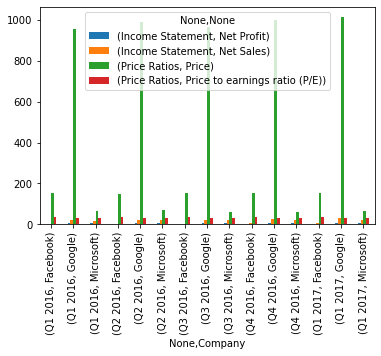

In [44]:
import matplotlib as  npl
st1.stack(level=2).plot(kind='bar')